In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Zomato URL                  0
Name of Restaurant          0
Address                     0
Location                    0
Cuisine                     0
Top Dishes               9641
Price for 2                 0
Dining Rating            5351
Dining Rating Count      5351
Delivery Rating          5851
Delivery Rating Count    5851
Features                    0
dtype: int64


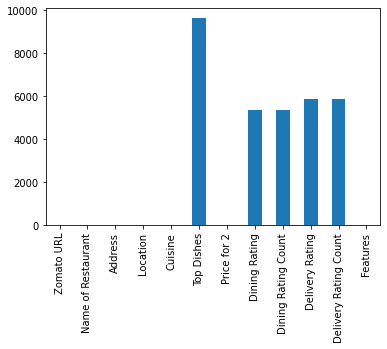

In [107]:
na_value = ["None","Does not offer Dining","Does not offer Delivery", "Not enough Delivery Reviews", "Not enough Dining Reviews","Invalid"]
data = pd.read_csv('chennai resturant\Zomato Chennai Listing 2020.csv',na_values=na_value)
data_missing = data.isnull().sum()
data_missing.plot.bar()
print(data_missing)


In [108]:
del data['Zomato URL']
del data['Top Dishes']
del data['Address']
# print(data)
print(data.isnull().sum())

Name of Restaurant          0
Location                    0
Cuisine                     0
Price for 2                 0
Dining Rating            5351
Dining Rating Count      5351
Delivery Rating          5851
Delivery Rating Count    5851
Features                    0
dtype: int64


In [109]:
data = data.dropna()
# print(data)
print(data.isnull().sum())

Name of Restaurant       0
Location                 0
Cuisine                  0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
dtype: int64


In [110]:
feature = data.iloc[:,8].values
# print(feature)
feature_count = []
len_feature = len(feature)

for i in range(len_feature):
    feature[i] = feature[i].split(',')

for i in range(len_feature):
    feature_count.append(len(feature[i]))

feature_cnt = np.array(feature_count)
feature_cnt = feature_cnt.reshape(feature_cnt.shape[0],1)
print(feature_cnt)

[[2]
 [4]
 [2]
 ...
 [2]
 [2]
 [2]]


In [111]:
cuisine = data.iloc[:,2].values
cuisine_count = []
len_cuisine = len(cuisine)

for i in range(len_cuisine):
    cuisine[i] = cuisine[i].split(',')

for i in range(len_cuisine):
    cuisine_count.append(len(cuisine[i]))

cuisine_cnt = np.array(cuisine_count)
cuisine_cnt = cuisine_cnt.reshape(cuisine_cnt.shape[0],1)
print(cuisine_cnt)

[[1]
 [5]
 [4]
 ...
 [4]
 [3]
 [2]]


In [112]:
feature_counts = pd.DataFrame(feature_cnt,columns=['Total Features'],index =data.index)
cuisine_counts = pd.DataFrame(cuisine_cnt,columns=['Total cuisines'],index=data.index)
print(feature_counts)


       Total Features
0                   2
1                   4
2                   2
3                   5
4                   2
...               ...
11666               3
11667               3
11736               2
11785               2
11794               2

[4381 rows x 1 columns]


In [113]:
new_data = pd.concat([data,cuisine_counts,feature_counts],axis =1)
print(new_data.sum())

Name of Restaurant       Yaa Mohaideen BriyaniSukkubhai BiriyaniSS Hyde...
Location                 PallavaramAlandurKodambakkamPeramburPeramburMe...
Cuisine                  [['Biryani'], ['Biryani',  ' North Indian',  '...
Price for 2                                                      1909910.0
Dining Rating                                                      15172.5
Dining Rating Count                                               740216.0
Delivery Rating                                                    16815.1
Delivery Rating Count                                            7361400.0
Features                 [['Home Delivery',  'Indoor Seating'], ['Home ...
Total cuisines                                                       12372
Total Features                                                       14643
dtype: object


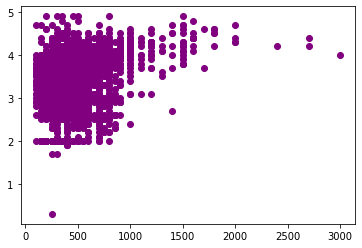

In [114]:
plt.scatter(x = new_data['Price for 2'],y=new_data['Dining Rating'],color = 'purple')

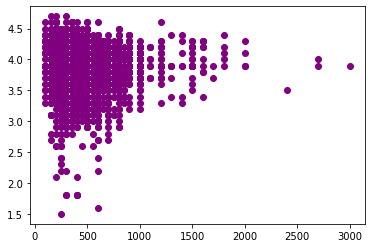

In [115]:
plt.scatter(x = new_data['Price for 2'],y=new_data['Delivery Rating'],color = 'purple')

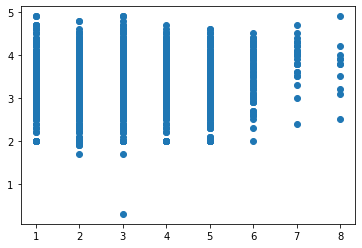

In [116]:
plt.scatter(x = new_data['Total cuisines'],y=new_data['Dining Rating'])

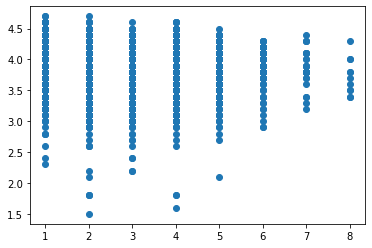

In [117]:
plt.scatter(x = new_data['Total cuisines'],y=new_data['Delivery Rating'])

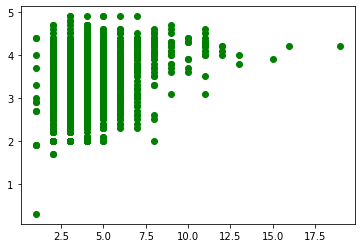

In [118]:
plt.scatter(x = new_data['Total Features'],y=new_data['Dining Rating'],color ='green')

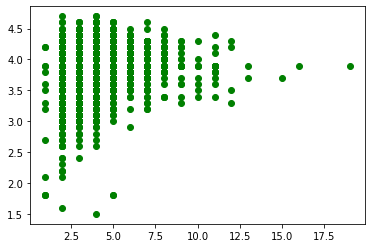

In [119]:
plt.scatter(x = new_data['Total Features'],y=new_data['Delivery Rating'], color = 'green')